In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
test_data = pd.read_table("/home/meric/Downloads/test-data.tsv",index_col=0)

In [ ]:
test_data.head()

In [ ]:
pca = PCA(n_components=5)

In [ ]:
pca.fit(test_data)

In [ ]:
pca.components_

In [ ]:
df = pd.DataFrame(pca.components_, columns =test_data.columns,index=pcs)

In [ ]:
pcs = []
for i in range(1,6):
    x = "PC{0}".format(i)
    pcs.append(x)

In [ ]:
pcs

In [ ]:
df = pd.DataFrame(pca.components_, columns =test_data.columns,index=pcs)
df.to_csv()

In [ ]:
df.head()

In [ ]:
type(pca.components_)

In [ ]:
df.to_csv("principal_components.tsv",sep='\t')

In [ ]:
pth = "/home/meric/Downloads/test-data.tsv"

In [ ]:
def sc_pca (input_path, output_path,n_comp = 5):
    input_data = pd.read_table(input_path,index_col=0)
    pca = PCA(n_components=n_comp)
    pca.fit(input_data)
    pca.components_
    pcs = []
    for i in range(1,n_comp+1):
        x = "PC{0}".format(i)
        pcs.append(x)
    pc_df = pd.DataFrame(pca.components_, columns =input_data.columns,index=pcs)
    pc_df.to_csv(output_path,sep="\t")
    return (pc_df)

In [ ]:
sc_pca(pth,"out/a.tsv")

In [6]:
import pandas as pd
import umap


In [23]:
# input path should be output of sc_PCA function
def sc_umap (input_path, output_path):
    input_data = pd.read_table(input_path,index_col=0)
    input_T = input_data.T
    um = umap.UMAP()
    X_fit = um.fit(input_T)
    X_umap = um.transform(input_T)
    umap_df = pd.DataFrame(data = X_umap, columns = ['umap comp. 1', 'umap comp. 2'])
    umap_df.to_csv(output_path,sep="\t")
    return (umap_df)

In [24]:
sc_umap("out/a.tsv","umap_coords.tsv")

,umap comp. 1,umap comp. 2
0,11.568132,2.369307
1,9.529893,2.650928
2,10.230000,0.096711
3,12.426225,0.842449
4,10.897599,0.109111
...,...,...
345,14.154822,9.191556
346,14.797130,8.635431
347,15.487749,7.630912
348,15.941669,8.019256


In [4]:
pca_out = pd.read_table("out/a.tsv",index_col=0)

In [5]:
pca_out.head()

,C1_0,C1_1,C1_2,C1_3,C1_4,C1_5,C1_6,C1_7,C1_8,C1_9,...,B_40,B_41,B_42,B_43,B_44,B_45,B_46,B_47,B_48,B_49
PC1,-0.059914,-0.056907,-0.066517,-0.064861,-0.067266,-0.062203,-0.059486,-0.069288,-0.060969,-0.066028,...,0.055723,0.041354,0.051745,0.065362,0.055505,0.064130,0.067840,0.066901,0.064143,0.076342
PC2,-0.042179,-0.038238,-0.045238,-0.048221,-0.045832,-0.041434,-0.033862,-0.055494,-0.041924,-0.045479,...,-0.029493,-0.037859,-0.031373,-0.032823,-0.030317,-0.032542,-0.030590,-0.022017,-0.028238,-0.037918
PC3,-0.017863,-0.023292,0.013688,0.118818,0.058341,0.032989,-0.130060,0.016114,0.027469,-0.014466,...,0.003636,-0.034886,-0.049983,-0.059948,0.103659,0.023486,0.034854,0.009345,0.095852,-0.011340
PC4,0.035356,-0.049224,-0.047748,0.084600,-0.021655,0.043432,-0.056649,-0.022057,-0.053111,-0.046415,...,0.005985,0.001027,-0.035369,0.080548,-0.121961,0.036286,-0.017478,-0.060717,-0.074115,0.010621
PC5,0.073486,0.031582,-0.042351,0.120388,-0.012340,-0.117341,-0.028464,-0.005059,-0.011090,0.038150,...,-0.016464,0.037444,0.004817,-0.040610,-0.032123,-0.073258,-0.031799,0.049988,0.051926,-0.046762


In [12]:
tt = pca_out.T

In [7]:
um = umap.UMAP()

In [20]:
X_fit = um.fit(tt)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [21]:

         # we'll use X_fit later
X_umap = um.transform(tt)

# Convert to data frame
umap_df = pd.DataFrame(data = X_umap, columns = ['umap comp. 1', 'umap comp. 2'])

# Shape and preview
print(umap_df.shape)
umap_df.head()

(350, 2)


,umap comp. 1,umap comp. 2
0,11.037499,6.024118
1,11.214242,3.650086
2,13.553104,4.978936
3,12.303544,7.004903
4,13.551064,5.636672


In [17]:
!pip install holoviews
!pip install datashader
import datashader
import bokeh
import holoviews
import matplotlib


You should consider upgrading via the '/home/meric/Desktop/single-cell-pathway-analysis/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/meric/Desktop/single-cell-pathway-analysis/venv/bin/python -m pip install --upgrade pip' command.


In [18]:
import umap.plot

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot: >

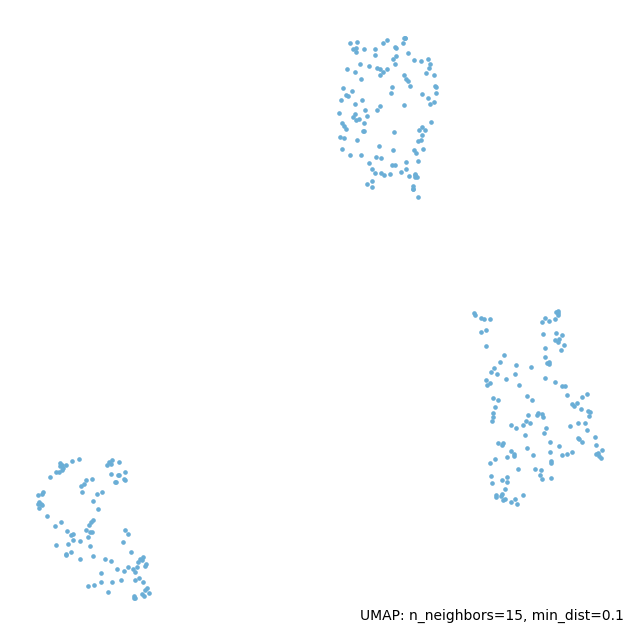

In [22]:
umap.plot.points(X_fit)